# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable to predicting whether or not someone has heart disease based on thire medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentaion

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI machine learning repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy on predicting whether or not a patient has heart disease during the proof of concept, We will persue the project.

## 4. Features

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

## Preparing the Tools

We are going to use Pandas, NumPy and Matplotlib for data analysis and manipulation.

In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries.

!conda install seaborn -y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear inside the notebook
%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve



==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda




Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\a2z\Desktop\heart-disease-project\env

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  scikit-learn         pypi/pypi::scikit-learn-1.7.1-pypi_0 --> pkgs/main/win-64::scikit-learn-1.6.1-py313h585ebfc_0 



Preparing transaction: done
Verifying transaction: done
Executing transaction: done


# Load Data

In [2]:
df = pd.read_csv("C:/Users/a2z/Downloads/heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset which you are working with.

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What is missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add,remove or change features to get more out of your data ?

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.tail()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [6]:
# Convert to binary classification (has heart disease or not)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [7]:
df["target"].value_counts()


target
1    509
0    411
Name: count, dtype: int64

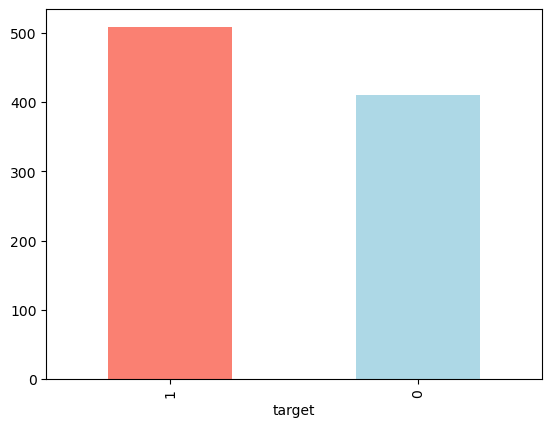

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


In [10]:
# Are there any missing values ?
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64

In [11]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000,1.000000


# Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,Female,Male
target,,
0,144,267
1,50,459


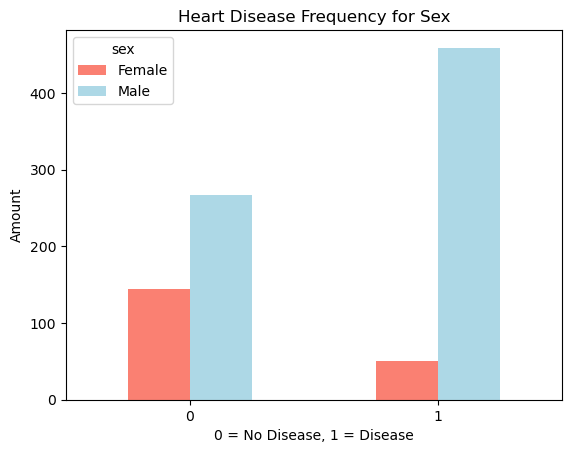

In [14]:
# Create a plot of crosstab
ax = pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


In [15]:
df["thalch"].value_counts()

thalch
150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
63.0      1
67.0      1
107.0     1
69.0      1
73.0      1
Name: count, Length: 119, dtype: int64

### Age vs Max Heart Rate for Heart Disease


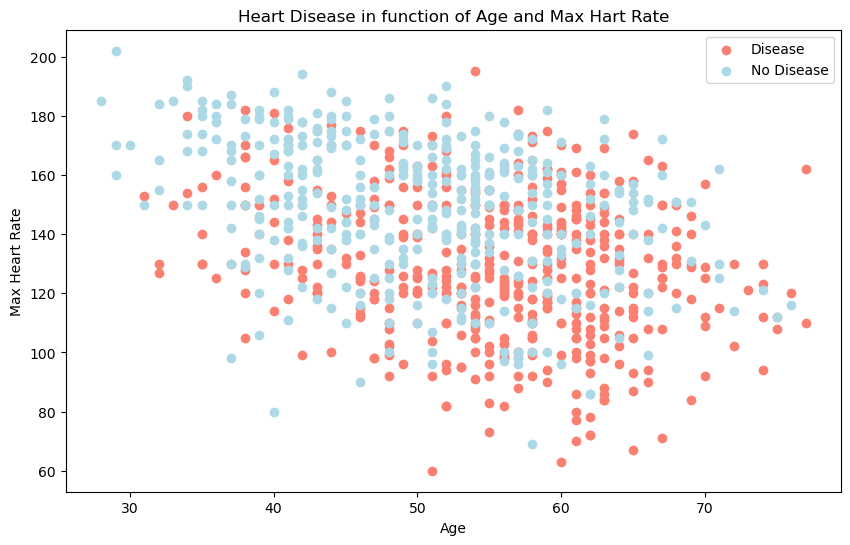

In [16]:
# Ceate another figure
plt.figure(figsize=(10, 6))

# Scatter with positive exaample 
plt.scatter(df.age[df.target==1],  # we are taking that age where that condition is true means that age where target=1
            df.thalch[df.target==1],
            c="salmon") 

# Scatter with negitive example
plt.scatter(df.age[df.target==0],
            df.thalch[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Hart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

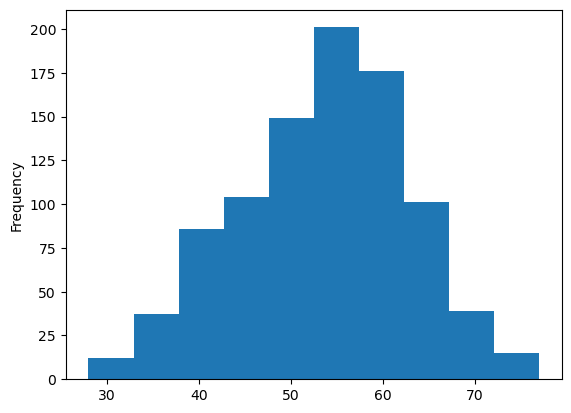

In [17]:
# Check the distribution(spread) of the age column with a Histogram
df.age.plot.hist()
plt.show()

# Heart Disease Frequency per Chest Pain Type

| Value | Chest Pain Type      | Meaning                                                                              |
| ----- | -------------------- | ------------------------------------------------------------------------------------ |
| 0     | **Typical angina**   | Chest pain related to **decreased blood supply to the heart** (predictable pattern). |
| 1     | **Atypical angina**  | Chest pain **not related to exertion**, may not be heart-related.                    |
| 2     | **Non-anginal pain** | Chest pain that is **not cardiac-related**, e.g., muscle or digestive issues.        |
| 3     | **Asymptomatic**     | **No chest pain**, but heart disease is present (silent ischemia).                   |



In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
asymptomatic,104,392
atypical angina,150,24
non-anginal,131,73
typical angina,26,20


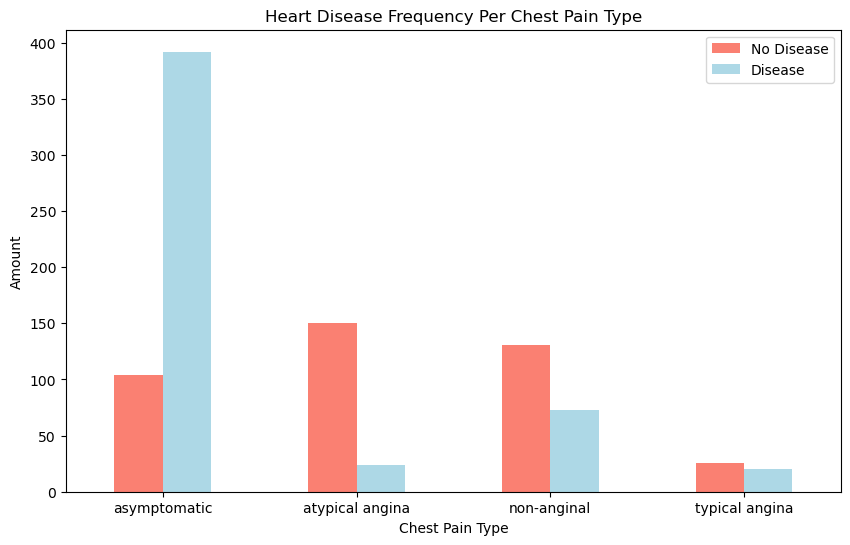

In [19]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize= (10, 6),
                                   color= ["salmon", "lightblue"])
# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

### Correlation matrix 

Correlation matrix is big table of numbers telling us how each independent variables are related to each other,
It measures the relationship between each pair of columns (numerical features).

The value ranges between:

+1 → strong positive relationship
(as one increases, the other also increases)

–1 → strong negative relationship
(as one increases, the other decreases)

0 → no linear relationship

In [20]:
# Make a correlation matrix ( basically comparing each row to eachother)
df.corr(numeric_only=True)


,id,age,trestbps,chol,thalch,oldpeak,ca,num,target
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552,0.356086
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596,0.282700
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291,0.106233
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547,-0.230583
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265,-0.394503
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084,0.385528
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216,0.455599
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000,0.783387
target,0.356086,0.282700,0.106233,-0.230583,-0.394503,0.385528,0.455599,0.783387,1.000000


| Feature Pair           | Correlation | Meaning                                                                                              |
| ---------------------- | ----------- | ---------------------------------------------------------------------------------------------------- |
| `age` and `target`     | 0.2827      | Weak positive: older people slightly more likely to have heart disease                               |
| `thalch` and `target`  | -0.3945     | Moderate negative: higher `thalch` (max heart rate achieved) → **less likely** to have heart disease |
| `oldpeak` and `target` | 0.3855      | Moderate positive: higher `oldpeak` (ST depression) → **more likely** to have heart disease          |
| `ca` and `target`      | 0.4556      | Stronger positive: higher `ca` (number of major vessels) → higher chance of disease                  |
| `num` and `target`     | **0.7834**  | Very strong positive: this likely means `num` is almost the same as `target` or directly related     |


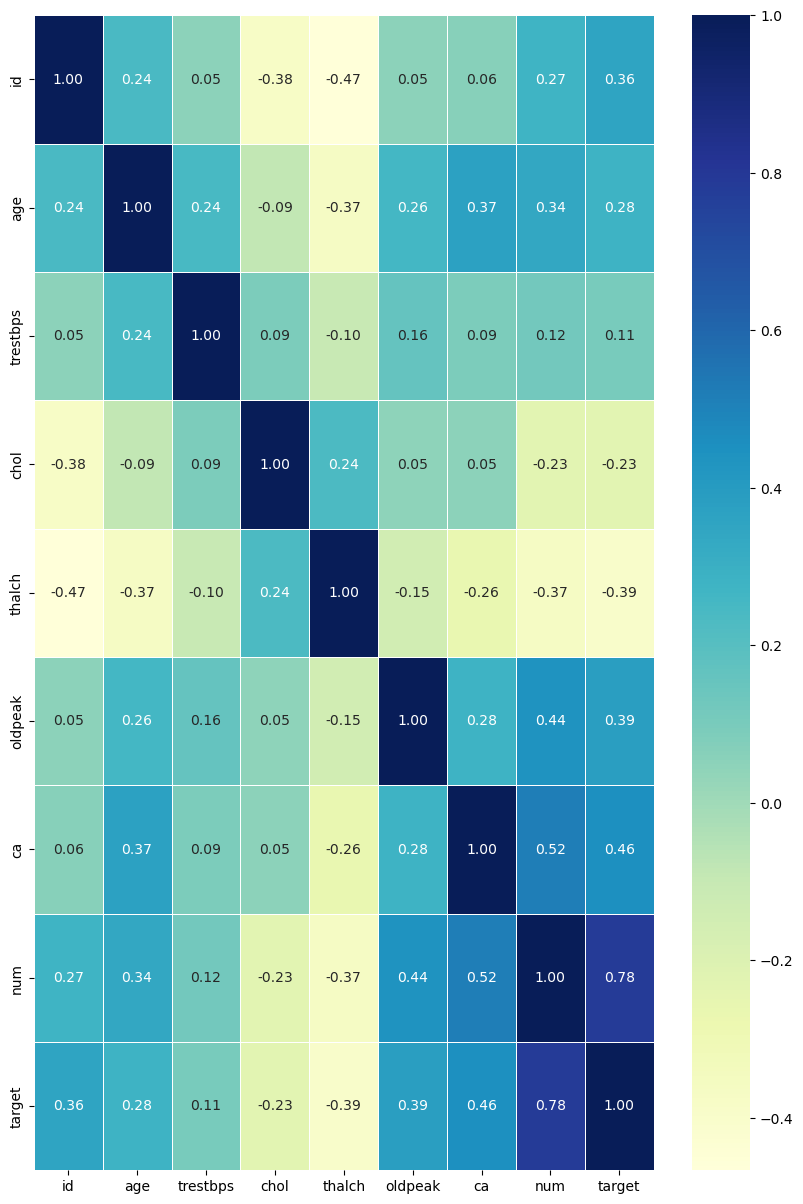

In [21]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,      # Shows correlation values inside the boxes
                 linewidths=0.5,  # Adds space between cells
                 fmt=".2f",       # Format it till two decimal places
                 cmap="YlGnBu")   # Color palette from yellow → green → blue.
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


# What is a Seaborn heatmap?
A Seaborn heatmap is a data visualization tool that shows the relationship between values in a matrix (2D table) using colors.

It’s most commonly used to:
✅ Visualize correlation matrices
✅ Show how strong the relationship is between variables.
 
1. Tables of numbers (like df.corr()) are hard to read.
2. A heatmap makes patterns immediately visible using color gradients (e.g., red = strong, white = weak)

# 5. Modeling

In [22]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [23]:
# Split data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [24]:
x

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
y

0      0
1      1
2      1
3      0
4      0
      ..
915    1
916    0
917    1
918    0
919    1
Name: target, Length: 920, dtype: int64

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2)


In [27]:
x_train

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
880,881,62,Male,VA Long Beach,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN,NaN,NaN,4
457,458,54,Male,Hungary,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN,NaN,NaN,0
797,798,51,Male,VA Long Beach,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,3
25,26,50,Female,Cleveland,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat,0.0,normal,0
84,85,52,Male,Cleveland,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,59,Male,Cleveland,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping,1.0,reversable defect,2
270,271,61,Male,Cleveland,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping,1.0,reversable defect,1
860,861,75,Male,VA Long Beach,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping,NaN,reversable defect,0
435,436,53,Female,Hungary,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat,NaN,NaN,0


In [28]:
y_train, len(y_train)

(880    1
 457    0
 797    1
 25     0
 84     0
       ..
 106    1
 270    1
 860    0
 435    0
 102    0
 Name: target, Length: 736, dtype: int64,
 736)

## Now we have got our data into training and split sets, it is time to build a machine learning model.

We will train it (find the patterns) on the training set.

We will test it (use the patterns) on the test set.

We are going to use 5 different machine learning models-
1.  Logistic Regression
2.  K-Nesrest Neighbours classifier
3.  Random Foreset Classifier
4.  XGBoost
5.  CatBoost

In [29]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : A dict of different Scikit-Learn machine learning models
    x_train : Training data (no lables)
    x_test : Testing data (no labels)
    y_train : Training labels
    y_test : Test labels

    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to  the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Ensure both train and test have the same columns
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

# Predict
xgb_preds = xgb_model.predict(x_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 1.0


C:\Users\a2z\Desktop\heart-disease-project\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:13:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(x_train, y_train)

# Predict
cat_preds = cat_model.predict(x_test)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, cat_preds))

CatBoost Accuracy: 1.0


In [35]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

In [36]:
from sklearn.impute import SimpleImputer

df_encoded = pd.get_dummies(df, drop_first=True)  # That created a new dataframe (df_encoded) where categorical columns like "Sex" or "ChestPainType" are now converted to numbers.

# Split features and labels
x = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

# Fill NaNs in features
imputer = SimpleImputer(strategy="mean")
x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train and evaluate
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

print(model_scores)



C:\Users\a2z\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\a2z\Desktop\heart-disease-project\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:13:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Logistic Regression': 1.0, 'KNN': 0.8097826086956522, 'Random Forest': 1.0, 'XGBoost': 1.0, 'CatBoost': np.float64(1.0)}


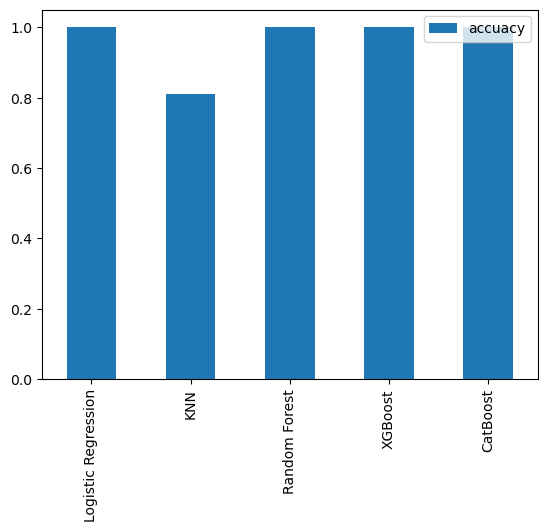

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuacy"])
model_compare.T.plot.bar()
plt.show()

 Now we have got our baseline model...  and we know model's first prediction are not always what we should based our next step off. What should do ?

Lets look at the following:
1. Hyperparameter tunung
2. Feature importance
3. Cross validation
4. Confusion matrix
5. Precision score
6. Recall score
7. f1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

# Hyperparameter tunning

In [38]:
# Lets tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop thorugh different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(x_train, y_train)

    # Update the training score list 
    train_scores.append(knn.score(x_train, y_train))

    # Update the test score list
    test_scores.append(knn.score(x_test, y_test))

In [39]:
train_scores

[1.0,
 0.8804347826086957,
 0.8668478260869565,
 0.8532608695652174,
 0.8491847826086957,
 0.8342391304347826,
 0.8301630434782609,
 0.811141304347826,
 0.8206521739130435,
 0.8125,
 0.811141304347826,
 0.8125,
 0.8206521739130435,
 0.813858695652174,
 0.8165760869565217,
 0.8206521739130435,
 0.8179347826086957,
 0.8125,
 0.811141304347826,
 0.8125]

In [40]:
test_scores

[0.7608695652173914,
 0.7010869565217391,
 0.8152173913043478,
 0.7771739130434783,
 0.8097826086956522,
 0.7989130434782609,
 0.8152173913043478,
 0.7880434782608695,
 0.8206521739130435,
 0.8043478260869565,
 0.8097826086956522,
 0.8097826086956522,
 0.8097826086956522,
 0.8043478260869565,
 0.8152173913043478,
 0.8043478260869565,
 0.8206521739130435,
 0.8097826086956522,
 0.8043478260869565,
 0.782608695652174]

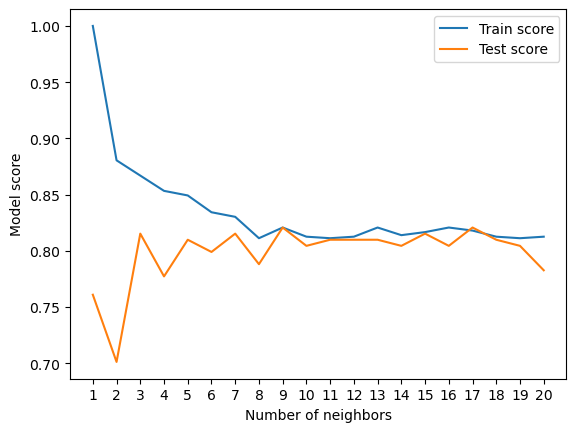

Maximum KNN score in the test data: 82.07%


In [41]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21 , 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show()

print(f"Maximum KNN score in the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tunning with RandomizedSeaarchCV

we are going to tune :
1. LogistiocRegression()
2. RandomForestClassifier()
... by using RandomizedSearchCV

### RandomizedSearchCV in Scikit-learn
RandomizedSearchCV is a powerful tool used to tune hyperparameters of machine learning models.
Instead of trying every possible combination (like GridSearchCV).

✅ So what does RandomizedSearchCV do?
RandomizedSearchCV:
1.Randomly tries a fixed number of hyperparameter combinations.
2. Tests each on your training data using cross-validation.
3. Finds a good (maybe best) combination faster than trying everything.
4. Good for large Hyperparameter space.

🤔Why not just try all combinations?
You could try every possible combination using GridSearchCV, but:
1. That takes a long time if there are many combinations.
2. Some combinations may be useless or very similar.
3. Good for small parameter space
   
🧠 Simple Analogy:
Imagine you’re trying to find the best dosa place in a city with 100 restaurants.
GridSearchCV: You try all 100 one by one.
RandomizedSearchCV: You try 10 randomly chosen ones. If you’re lucky, you’ll find one of the best quickly



In [42]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf":np.arange(1, 20, 2)}

In [43]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [44]:
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [45]:
# Now in this project our LogisticRegression() and RandomForestClassifier() having perfect  scores but in future in any other project in any other model if we scores are low and we needed to improve the scores then we will create a hyperparameter grid(like abouve) then setup each of our model then tune them by RandomizedSearchCV

In [46]:
# Tune LogisticRegression
np.random.seed(42)

# setup random Hyperparameters search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameters search for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [48]:
rs_log_reg.score(x_test, y_test)   

1.0

### Now we've tuned LogisticRegression(), Let's  dosame for RandomForestClassifier()

In [49]:
# Tune LogisticRegression
np.random.seed(42)

# setup random Hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameters search for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
# Find the best Hyperparameter
rs_rf.best_params_

{'n_estimators': np.int64(610),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(1),
 'max_depth': 5}

In [51]:
# Evaluate the randomized search Hyperparameter for RandomForestClassifier()
rs_rf.score(x_train, y_train)  # it will improve by previous 

1.0

In [52]:
# Let's say our logisticRegression() model's score is not improving even we tried RandomSearchCV so what would we do now ? , We should try GridSearchCV 

# Hyperparameter Tuning using GridSearchCV

In [53]:
# Different Hyperpameters for our LogisticRegression() model
log_reg_grid = {"C":np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid Hyperparameter search for our LogisticRegression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid Hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
# Check  the  best Hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.38566204211634725), 'solver': 'liblinear'}

In [55]:
# Evaluate the GridSearch LogisticRegression model
gs_log_reg.score(x_test, y_test)

1.0

In [64]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Evaluating our tuned machine learning classifier, beyond accuracy

* Classifier report
* Confusion matrix
* Precision
* Recll
* F1
* ROC and AUC score

...and it would be great if cross validation will used where possible.

To make comparision and evaluate our trained model, first we need to make predictions.

In [56]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [57]:
y_preds

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [58]:
y_test

319    0
377    0
538    1
296    1
531    1
      ..
382    0
97     1
906    1
467    0
732    1
Name: target, Length: 184, dtype: int64

🔷 What is ROC(Receiver Operating Characteristic) Curve?
* It is a graph that shows how well your model can distinguish between positive and negative classes (e.g., disease vs. no disease).

✅ What does it plot?
* X-axis → False Positive Rate (FPR)
→ % of actual negatives your model wrongly predicted as positive

* Y-axis → True Positive Rate (TPR)
→ % of actual positives your model correctly predicted as positive

🔷 What is AUC(Area Under the Curve?
* It is the area under the ROC curve. It tells how much your model is capable of distinguishing between classes.
###Sumup
* “The ROC curve helps us understand the trade-off between the true positive rate and false positive rate at different thresholds. AUC (area under the curve) gives a single number to summarize model performance — the higher, the better. An AUC of 0.5 means the model is no better than random, while close to 1.0 means it can distinguish classes very well.”




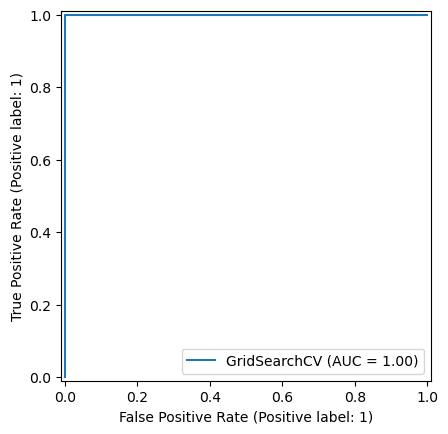

In [59]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()


In [60]:
# Confution matrix
print(confusion_matrix(y_test, y_preds))

[[ 75   0]
 [  0 109]]


In [62]:
It predicts                                           
             |   0   |   1
         -------------------
Actual  0 |   75  |   0
        1 |    0  | 109

              |  0   |  1
         -------------------
        0 |   TN  |  FP
Actual  -------------------
        1 |   FN  |  TP


IndentationError: unindent does not match any outer indentation level (<string>, line 3)

In [ ]:
sns.set(font_scale=0.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confution matrix using seaborn's heatmap()

    """
    fig, ax = plt.subplots(figsize=(2, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)
plt.show()

In [ ]:
# Now we've got a ROC curve , an AUC matrix and a confusion matrix, Let's get a classification report as well as recall,precision and f1 score

In [ ]:
print(classification_report(y_test, y_preds))


# Calculate evaluation metric using cross validation
We are going to calculate precision,recall and f1 score this time using cross validation (it take folds so more accuracy) and to do so we'll be using cross_val_score()

In [ ]:
# Check best parameters
gs_log_reg.best_params_

In [ ]:
# Create a new classifier with best Hyperparameter
clf = LogisticRegression(C=0.38566204211634725,
                        solver="liblinear")

In [ ]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       scoring="accuracy")
cv_acc

In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validated precision
cv_precision=cross_val_score(clf,
                       x,
                       y,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validated recall
cv_recall=cross_val_score(clf,
                       x,
                       y,
                       scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validated f1 score
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize cross validated metrics
cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "f1":cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title= "Cross-validated classification metrics",
                      legend=False)
plt.show()


# Feature importance
Feature importance is another way of asking, "Which Features contributed most to the outcomes of the model and how they contribute ?"

Finding Feature impportance is different for each machine learnng model.One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find feature importance for our LogisticRegression model

In [ ]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_



In [ ]:
clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")
clf.fit(x_train, y_train)

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# Match coef's of features and columns
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualixe feature importance
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature_importance", legend=False)
plt.show()

In [ ]:
pd.crosstab(df["sex"], df["target"])

In [ ]:
pd.crosstab(df["slope"], df["target"])

In [ ]:
🔹 Slope of the Peak Exercise ST Segment
* It describes the slope (trend) of the ST segment on an electrocardiogram (ECG) during peak exercise.

👉 What is ST segment?
* The ST segment is part of an ECG that reflects the time between ventricular contraction and recovery (repolarization).
* Abnormalities in the ST segment can indicate heart problems, especially coronary artery disease.

| Value | Meaning                                                |
| ----- | ------------------------------------------------------ |
| 0     | Upsloping — heart rate increases, usually normal       |
| 1     | Flat — could indicate heart disease                    |
| 2     | Downsloping — more severe, strong indicator of disease |


## 6. Experimentation

####  Let's try to improve KNN score

In [ ]:
# Let's try to improve KNN score

# 1. One-hot encode all categorical (object) columns
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

# 2. Align columns in case of mismatch between train/test
# (ensures both train and test have the same dummy columns)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1)

# 3. Fill any NaNs introduced by align with 0
x_train_encoded = x_train_encoded.fillna(0)
x_test_encoded = x_test_encoded.fillna(0)

# 4. Scale features (important for KNN distance calculations)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)


### Why scale features before KNN?
- KNN calculates distances between data points.  
- Features with larger numeric ranges (e.g., cholesterol in 100s vs. age in 10s) dominate distance calculations.  
- Scaling standardizes features (mean=0, variance=1), so each contributes equally.  

In [ ]:
# Define KNN
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"]
}

# GridSearchCV
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Fit on encoded & scaled training data
knn_grid.fit(x_train_scaled, y_train)

# Results
print("Best params:", knn_grid.best_params_)
print("Best CV score:", knn_grid.best_score_)
print("Test score:", knn_grid.score(x_test_scaled, y_test))



In [ ]:
# ==========================================
# Improved KNN with GridSearchCV
# (Tuning distance metric + stratified CV)
# ==========================================

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Define KNN model
knn = KNeighborsClassifier()

# Parameter grid to tune:
# - n_neighbors: odd values to avoid ties
# - weights: uniform vs distance
# - p: 1 = Manhattan, 2 = Euclidean
param_grid = {
    "n_neighbors": range(1, 31, 2),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# Use stratified cross-validation for balanced evaluation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Grid search with accuracy scoring
knn_grid = GridSearchCV(
    knn,
    param_grid,
    cv=cv_strategy,
    scoring="accuracy",
    n_jobs=-1
)

# Fit on scaled training data
knn_grid.fit(x_train_scaled, y_train)

# Best parameters
print("Best params:", knn_grid.best_params_)

# Train accuracy (cross-validation best score)
print("Best CV score:", knn_grid.best_score_)

# Test accuracy on hold-out test set
print("Test set score:", knn_grid.score(x_test_scaled, y_test))


In [ ]:
# ==========================================
# Feature Selection + KNN
# ==========================================
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Define pipeline: SelectKBest -> KNN
pipeline = Pipeline([
    ("select", SelectKBest(score_func=f_classif)),  # ANOVA F-test
    ("knn", KNeighborsClassifier())
])

# Parameter grid includes both feature selection & KNN tuning
param_grid_fs = {
    "select__k": [5, 7, 9, 11, "all"],  # try reducing features
    "knn__n_neighbors": range(1, 21, 2),
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

# Grid search with stratified CV
knn_fs_grid = GridSearchCV(
    pipeline,
    param_grid_fs,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    scoring="accuracy",
    n_jobs=-1
)

# Fit
knn_fs_grid.fit(x_train_scaled, y_train)

# Results
print("Best params:", knn_fs_grid.best_params_)
print("Best CV score:", knn_fs_grid.best_score_)
print("Test set score:", knn_fs_grid.score(x_test_scaled, y_test))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn_fs_grid.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_fs_grid.classes_)
disp.plot(cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
